# Fitting Plots

Essential for determining the fit of a model to data, curve fitting is ubiquitous. Using the `scipy.optimize.curve_fit` functionality, we can define a function used to fit the data.

By the end of this file you should be able to:
1. Fit data to a predefined function

Further reading:    
https://lmfit.github.io/lmfit-py/intro.html
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.optimize import curve_fit

## Fit a nonlinear function:

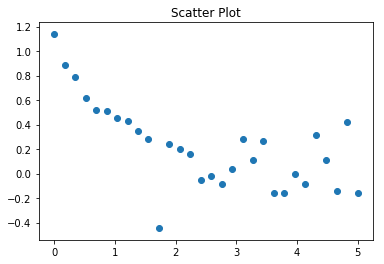

In [2]:
X = np.linspace(0, 5, 30)
Y = np.exp(-X) + normal(0, 0.2, 30)

plt.scatter(X,Y)
plt.title('Scatter Plot')
plt.show()

Now that we have the data, let's see about a fit. We use the curve_fit function from the scipy.optimize module, which requires a function and the data. 

A guess parameter (`p0`, optional) is important for exponential fits:

In [3]:
def func(x_vals, A, B, C):
    return A * np.exp(-B * x_vals) + C

init_guess = (1, 1e-6, 1) # Use an initial guess
opt, cov = curve_fit(func, X, Y, p0=init_guess)

The outputs are the optmized parameters (opt) and the covariance matrix (cov). 

Next, we apply the optimzation parameters to the functions to generate a plot that shows the fit:


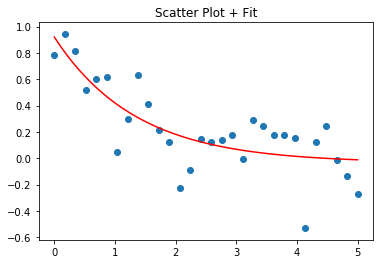

In [5]:
x_fitted = np.linspace(0, 5)
y_fitted = func(x_fitted, *opt)

plt.scatter(X,Y)
plt.plot(x_fitted,y_fitted, color="red")
plt.title('Scatter Plot + Fit')
plt.show()

# Gaussian fit:

Here, we generate a lot of normally distributed random numbers and use the histogram of the normally distributed numbers to fit a guassian curve. Here, the use of `bounds` is also optional:

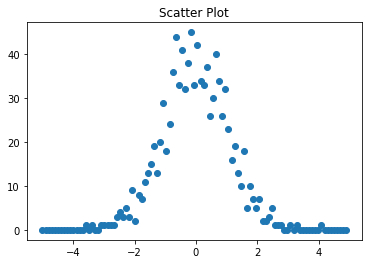

In [6]:
rand_gen = normal(0,1,1000)               # Generate numbers
bins = np.linspace(-5,5,num=100)
histogram = np.histogram(rand_gen,bins);  # Use histogram to get distribution

X = histogram[1][:-1]
Y = histogram[0]
plt.scatter(X,Y)
plt.title('Scatter Plot')
plt.show()

In [7]:
def gauss_func(x_vals, ampl, sig, mu):
    return ampl * np.exp(-(-x_vals-mu)**2/(2*sig**2))

bounds_set = ([0,0,0],[max(Y)*10, 10, 1]) # We can set bounds on the fit too
opt, cov = curve_fit(gauss_func, X, Y, bounds=bounds_set)

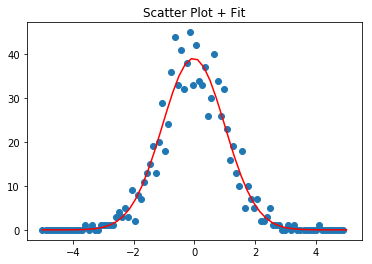

In [8]:
x_fitted = np.linspace(-5, 5)
y_fitted = gauss_func(x_fitted, *opt)

plt.scatter(X,Y)
plt.plot(x_fitted,y_fitted, color='red')
plt.title('Scatter Plot + Fit')
plt.show()